<a href="https://colab.research.google.com/github/pavaniiii/nlp_literature_survey/blob/main/Alanine_dipeptide_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the packages used

In [2]:
!git clone https://github.com/markovmodel/deeptime.git

fatal: destination path 'deeptime' already exists and is not an empty directory.


In [3]:
cd /content/deeptime/vampnet/

/content/deeptime/vampnet


In [4]:
!python setup.py install

/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.9 MB/s eta 0:00:00
[04/25/24 11:39:01] WARNING  toml section missing 'pyproject.toml does not   ]8;id=257006;file:///content/deeptime/vampnet/.eggs/setuptools_scm-8.0.4-py3.10.egg/setuptools_scm/_integration/pyproject_reading.py\pyproject_reading.py]8;;\:]8;id=717218;file:///content/deeptime/vampnet/.eggs/setuptools_scm-8.0.4-py3.10.egg/setuptools_scm/_integration/pyproject_reading.py#42\42]8;;\
                   

In [5]:
!git clone https://github.com/markovmodel/mdshare.git

Cloning into 'mdshare'...
remote: Enumerating objects: 456, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 456 (delta 4), reused 10 (delta 2), pack-reused 437
Receiving objects: 100% (456/456), 135.16 KiB | 1017.00 KiB/s, done.
Resolving deltas: 100% (228/228), done.


In [6]:
pip install ./mdshare

Processing ./mdshare
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 1.8 MB/s eta 0:00:00
  Created wheel for mdshare: filename=mdshare-0.4.2-py3-none-any.whl size=20472 sha256=ff00228e5ec26d6b5ac9e91c9c05bc35c0b1da1f87338f78a45495bc97f0ed1a
  Stored in directory: /tmp/pip-ephem-wheel-cache-3pomdc45/wheels/ec/9f/67/dd6f4335b5591b88a8337cda093a2265e64620573147f8b56b
Successfully built mdshare


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import vampnet
from vampnet import data_generator as vamp_data_generator
from keras import Model
from keras.layers import Dense, Activation, Flatten, Input, BatchNormalization, concatenate
from keras import optimizers
import tensorflow as tf
import matplotlib.gridspec as gridspec

/content/deeptime/vampnet/vampnet/__init__.py:20: UserWarning: Module vampnet was already imported from /content/deeptime/vampnet/vampnet/__init__.py, but /usr/local/lib/python3.10/dist-packages/vampnet-0.1.4.dev16+gc88ed3f.d20240425-py3.10.egg is being added to sys.path
  __version__ = get_distribution(__name__).version


In [8]:
# Necessary for downloading the trajectory data
import mdshare

In [9]:
!pip install pyemma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mdtraj-1.9.9-cp310-cp310-linux_x86_64.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.5 MB/s eta 0:00:00
  Using cached deeptime-0.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
  Created wheel for pyemma: filename=pyEMMA-2.5.12-cp310-cp310-linux_x86_64.whl size=2712147 sha256=41d1c51821bdc1085f5f2e1ab6609c1b50e91a2067387956b50af7b1263a621b
  Stored in directory: /root/.cache/pip/wheels/26/e7/52/8fcd9a27e834967fc71dedff33de9038999783184ec26af7a6
Successfully built pyemma


# Load Data

In [10]:
import pyemma.coordinates as pycoor

# Define Hyperparameters

In [11]:
# Tau, how much is the timeshift of the two datasets
tau = 1

# Batch size for Stochastic Gradient descent
batch_size = 1000

# Which trajectory points percentage is used as training
train_ratio = 0.9

# How many hidden layers the network has
network_depth = 6

# Width of every layer
layer_width = 100

# Learning rate used for the ADAM optimizer
learning_rate = 1e-4

# How many output states the network has
output_size = 6

# Iteration over the training set in the fitting process
nb_epoch = 60

epsilon = 1e-5

In [12]:
traj_whole, dihedral = vamp_data_generator.get_alanine_data()

traj_data_points, input_size = traj_whole.shape

# Initialized the VAMPnets wrapper class

In [13]:
vamp = vampnet.VampnetTools(epsilon = epsilon)

# Shuffle trajectory and lagged trajectory together

In [14]:
length_data = traj_data_points - tau

traj_ord = traj_whole[:length_data]
traj_ord_lag = traj_whole[tau:length_data+tau]


dihedral_init = dihedral[:length_data]

indexes = np.arange(length_data)
np.random.shuffle(indexes)

traj = traj_ord[indexes]
traj_lag = traj_ord_lag[indexes]
dihedral_shuffle = dihedral_init[indexes]

# Prepare data for tensorflow usage

In [15]:
length_train = int(np.floor(length_data * train_ratio))
length_vali = length_data - length_train

traj_data_train = traj[:length_train]
traj_data_train_lag = traj_lag[:length_train]

traj_data_valid = traj[length_train:]
traj_data_valid_lag = traj_lag[length_train:]

# Input of the first network
X1_train = traj_data_train.astype('float32')
X2_train  = traj_data_train_lag.astype('float32')

# Input for validation
X1_vali = traj_data_valid.astype('float32')
X2_vali = traj_data_valid_lag.astype('float32')

# Needs a Y-train set which we dont have.
Y_train = np.zeros((length_train,2*output_size)).astype('float32')
Y_vali = np.zeros((length_vali,2*output_size)).astype('float32')

# Run several model iterations saving the best one, to help finding sparcely populated states

In [16]:
max_vm = 0
attempts = 10

# IMPORTANT: the function vamp.loss_VAMP2_autograd can only be used with tensorflow 1.6 or more recent.
# For older versions of TF, use the function vamp.loss_VAMP2

losses = [
          vamp.loss_VAMP2_autograd,
]


for i in range(attempts):

    # Clear the previous tensorflow session to prevent memory leaks
    #clear_session()

    # Build the model


    nodes = [layer_width]*network_depth

    Data_X = Input(shape = (input_size,))
    Data_Y = Input(shape = (input_size,))

    # A batch normalization layer improves convergence speed
    bn_layer = BatchNormalization()

    # Instance layers and assign them to the two lobes of the network
    dense_layers = [Dense(node, activation = 'elu')# if index_layer < 3 else 'linear nodes')
                    for index_layer,node in enumerate(nodes)]

    lx_branch = bn_layer(Data_X)
    rx_branch = bn_layer(Data_Y)

    for i, layer in enumerate(dense_layers):

        lx_branch = dense_layers[i](lx_branch)
        rx_branch = dense_layers[i](rx_branch)


    # Add a softmax output layer.
    # Should be replaced with a linear activation layer if
    # the outputs of the network cannot be interpreted as states
    softmax = Dense(output_size, activation='softmax')

    lx_branch = softmax(lx_branch)
    rx_branch = softmax(rx_branch)

    # Merge both networks to train both at the same time
    merged = concatenate([lx_branch, rx_branch])

    # Initialize the model and the optimizer, and compile it with
    # the loss and metric functions from the VAMPnets package
    model = Model(inputs = [Data_X, Data_Y], outputs = merged)
    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate / 10)

    vm1 = np.zeros((len(losses), nb_epoch))
    tm1 = np.zeros_like(vm1)
    vm2 = np.zeros_like(vm1)
    tm2 = np.zeros_like(vm1)
    vm3 = np.zeros_like(vm1)
    tm3 = np.zeros_like(vm1)

    for l_index, loss_function in enumerate(losses):


        model.compile(optimizer = adam,
                      loss = loss_function,
                      metrics = [
                          vamp.metric_VAMP,
                          vamp.metric_VAMP2,
                                 ])


        # Train the model

        hist = model.fit([X1_train, X2_train], Y_train ,
                         batch_size=batch_size,
                         epochs=nb_epoch,
                         validation_data=([X1_vali, X2_vali], Y_vali ),
                         verbose=0)


        vm1[l_index] = np.array(hist.history['val_metric_VAMP'])
        tm1[l_index] = np.array(hist.history['metric_VAMP'])


        vm2[l_index] = np.array(hist.history['val_metric_VAMP2'])
        tm2[l_index] = np.array(hist.history['metric_VAMP2'])

        vm3[l_index] = np.array(hist.history['val_loss'])
        tm3[l_index] = np.array(hist.history['loss'])


    vm1 = np.reshape(vm1, (-1))
    tm1 = np.reshape(tm1, (-1))
    vm2 = np.reshape(vm2, (-1))
    tm2 = np.reshape(tm2, (-1))
    vm3 = np.reshape(vm3, (-1))
    tm3 = np.reshape(tm3, (-1))

    # Average the score obtained in the last part of the training process
    # in order to estabilish which model is better and thus worth saving


    score = vm1[-5:].mean()
    extra_msg = ''
    if score > max_vm:
        extra_msg = ' - Highest'
        best_weights = model.get_weights()
        max_vm = score
        vm1_max = vm1
        tm1_max = tm1
        vm2_max = vm2
        tm2_max = tm2
        vm3_max = vm3
        tm3_max = tm3

    print('Score: {0:.2f}'.format(score) + extra_msg)

Score: 3.68 - Highest
Score: 3.68
Score: 3.68
Score: 3.68
Score: 3.68 - Highest
Score: 3.68
Score: 3.68 - Highest
Score: 3.68
Score: 3.68
Score: 3.68


# Recover the saved model and its training history

In [17]:
model.set_weights(best_weights)

tm1 = np.array(tm1_max)
tm2 = np.array(tm2_max)
tm3 = np.array(tm3_max)
vm1 = np.array(vm1_max)
vm2 = np.array(vm2_max)
vm3 = np.array(vm3_max)


# Training result visualization

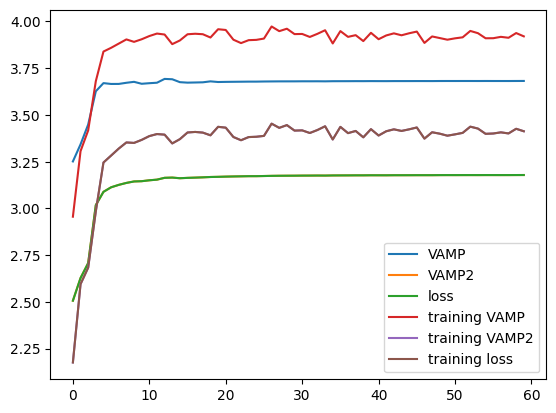

In [18]:
plt.plot(vm1, label = 'VAMP')
plt.plot(vm2, label = 'VAMP2')
plt.plot(-vm3, label = 'loss')
plt.plot(tm1, label = 'training VAMP')
plt.plot(tm2, label = 'training VAMP2')
plt.plot(-tm3, label = 'training loss')
plt.legend()
plt.show()

In [19]:
# Transform the input trajectory using the network
states_prob = model.predict([traj_ord, traj_ord_lag])[:, :output_size]

# Order the output states based on their population
coor_pred = np.argmax(states_prob, axis = 1)
indexes = [np.where(coor_pred == np.multiply(np.ones_like(coor_pred), n)) for n in range(output_size)]
states_num = [len(i[0]) for i in indexes]
states_order = np.argsort(states_num).astype('int')[::-1]

pred_ord = states_prob[:,states_order]

7813/7813 [==============================] - 17s 2ms/step


# Visualize the population of the states

States population: [39.62175849 23.41009364 22.92929172 10.81204325  3.0760123   0.1508006 ]%


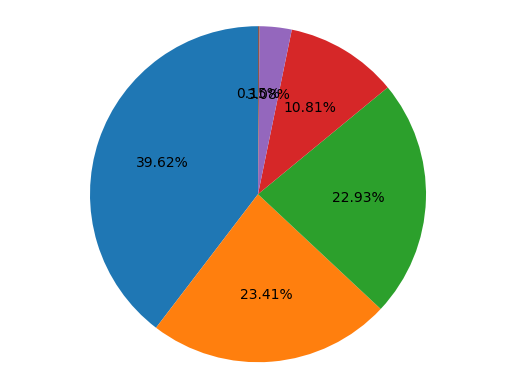

In [20]:
def print_states_pie_chart():
    coors = []
    maxi = np.max(pred_ord, axis= 1)

    for i in range(output_size):
        coors.append(len(np.where(pred_ord[:,i] == maxi)[0]))

    fig1, ax1 = plt.subplots()
    ax1.pie(np.array(coors), autopct='%1.2f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    print('States population: '+str(np.array(coors)/len(maxi)*100)+'%')
    plt.show()

print_states_pie_chart()

# Visualize how the 4 states are placed on the Ramachandran plot

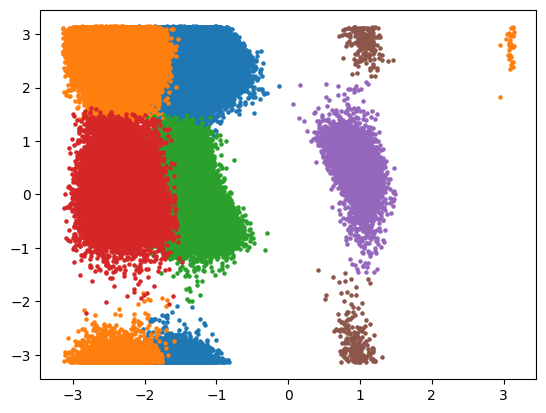

In [21]:
maxi_train = np.max(pred_ord, axis= 1)
coor_train = np.zeros_like(pred_ord)
for i in range(output_size):
    coor_train = np.where(pred_ord[:,i]== maxi_train)[0]
    plt.scatter(dihedral_init[coor_train,0], dihedral_init[coor_train,1], s=5)
plt.axes = [[-np.pi, np.pi],[-np.pi, np.pi]]

# For each state, visualize the probabilities the different trajectory points have to belong to it

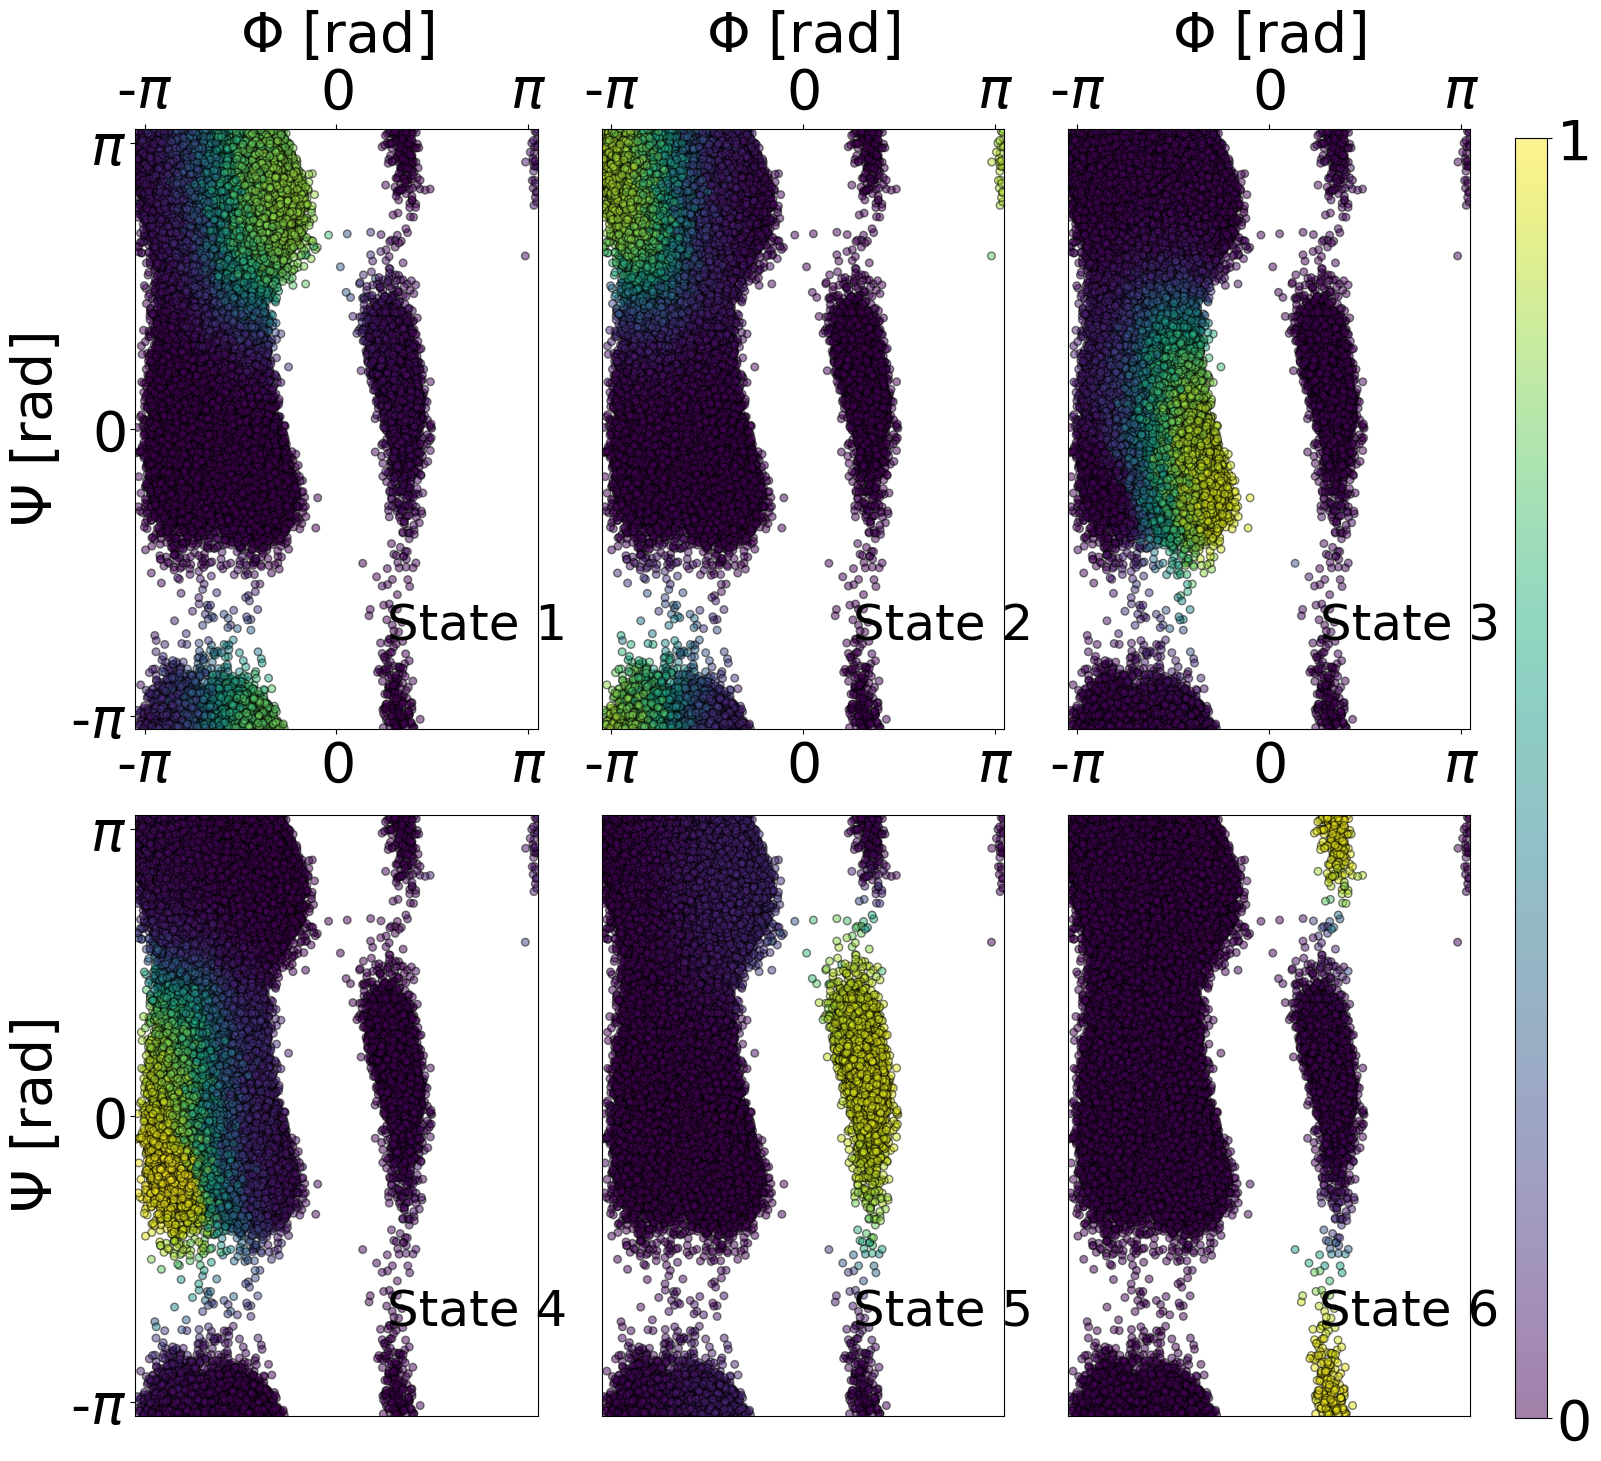

In [23]:
fig = plt.figure(figsize=(16, 16))

gs1 = gridspec.GridSpec(2, int(np.ceil(output_size/2)))
gs1.update(wspace=0.05, hspace = 0.05)

for n in range(output_size):
    ax = plt.subplot(gs1[n])
    im = ax.scatter(dihedral_init[:,0], dihedral_init[:,1], s=30,
                    c = pred_ord[:,n],
                    alpha=0.5, edgecolor='black',
                    vmin = 0, vmax = 1
                    )
    plt.axis('on')
    title = 'State '+str(n + 1)

    ax.text(.85, .15, title,
        horizontalalignment='center',
        transform=ax.transAxes,  fontdict = {'size':36})


    if (n < 3):
        ax.set_xticks([-3, 0, 3])
        ax.set_xticklabels([r'-$\pi$', r'$0$', r'$\pi$'])
        ax.xaxis.set_tick_params(top='on', bottom='off', labeltop='on', labelbottom='off')
        ax.xaxis.set_tick_params(labelsize=40)
    else:
        ax.set_xticks([])
    if (n%3==0):
        ax.set_yticks([-3, 0, 3])
        ax.set_yticklabels([r'-$\pi$', r'$0$', r'$\pi$'])
        ax.yaxis.set_tick_params(labelsize=40)
    else:
        ax.set_yticks([])
#    ax.set_aspect('equal')
    ax.set_xlim([-np.pi, np.pi]);
    ax.set_ylim([-np.pi, np.pi]);

    if (n%3 == 0):
        ax.set_ylabel(r'$\Psi$ [rad]', fontdict = {'size':40})
    if (n < 3):
        ax.set_xlabel(r'$\Phi$ [rad]', fontdict = {'size':40}, position = 'top')
        ax.xaxis.set_label_coords(0.5,1.2)

gs1.tight_layout(fig, rect=[0, 0.03, 0.95, 0.94])
fig.show()

cax = fig.add_axes([0.95, 0.05, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cax, ticks=[0, 1])
cbar.ax.yaxis.set_tick_params(labelsize=40)

# Markov Model Estimation

# Estimate the implied timescales

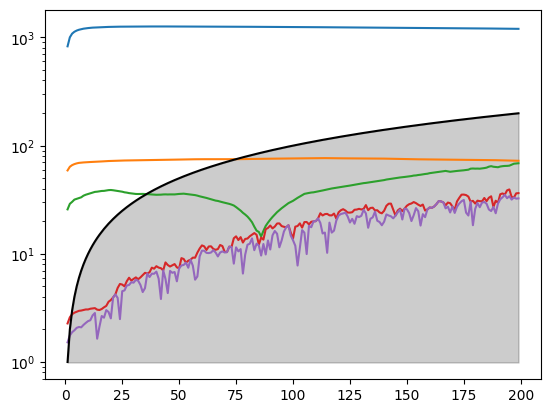

In [24]:
max_tau = 200
lag = np.arange(1, max_tau, 1)
its = vamp.get_its(pred_ord, lag)
vamp.plot_its(its, lag)

# Chapman-Kolmogorov test for the estimated koopman operator

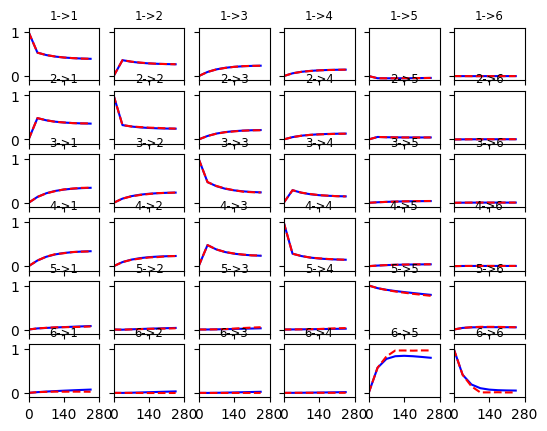

In [25]:
steps = 8
tau_msm = 35
predicted, estimated = vamp.get_ck_test(pred_ord, steps, tau_msm)
vamp.plot_ck_test(predicted, estimated, output_size, steps, tau_msm)